<a href="https://colab.research.google.com/github/zedo87/git_practice/blob/main/Yahoo_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd

In [ ]:


# Define the ticker symbol
ticker_symbol = 'KSS'

# Get data on this ticker
ticker_data = yf.Ticker(ticker_symbol)

In [ ]:
ticker_symbol = 'WMT'

ticker_data = yf.Ticker(ticker_symbol)

balance_sheet = ticker_data.balance_sheet
financials = ticker_data.financials
cashflow = ticker_data.cashflow

In [ ]:
pd.set_option('display.max_rows', 1000)

In [ ]:
companies = {
    'Walmart':'WMT',
    'Kohls':'KSS',
    'Amazon':'AMZN',
    'Costco':'COST',
    'Lowes':'LOW',
    'Target':'TGT',
    'Kroger':'KR',
    'Tesco':'TSCO',
    'Carrefour':'CA.PA',
    'Sainsburys':'SBRY.L',
    'Koninklijke Ahold Delhaize NV':'AD.AS',
     'Loblaws':'L.TO',
    'Woolworths Group':'WOW.AX',
    'Metro AG':'B4B.DE',
    'Seven & I Holdings':'SVNDY',
    'Grupo Bimbo':'BIMBOA.MX'}

In [ ]:
balance_sheets = pd.DataFrame()
financial_sheets = pd.DataFrame()
for ticker in companies.values():
    ticker_data = yf.Ticker(ticker)
    balance_sheet = ticker_data.balance_sheet
    balance_sheets[ticker] = balance_sheet.iloc[:,0]

    financials = ticker_data.financials
    financial_sheets[ticker] = financials.iloc[:,0]

In [ ]:
df_annual_reports = pd.concat([balance_sheets, financial_sheets]).T

In [ ]:
df_annual_reports['APT'] = df_annual_reports['Cost Of Revenue']/df_annual_reports['Accounts Payable']
df_annual_reports['INVT'] = df_annual_reports['Cost Of Revenue']/df_annual_reports['Inventory']
df_annual_reports['ART'] = df_annual_reports['Total Revenue']/df_annual_reports['Accounts Receivable']
df_annual_reports['PPET'] = df_annual_reports['Net PPE']/df_annual_reports['Total Revenue']
df_annual_reports['MET'] = df_annual_reports['Machinery Furniture Equipment']/df_annual_reports['Total Revenue']

In [ ]:
df_annual_reports['ART'] = df_annual_reports['ART'].fillna(0)

In [ ]:
df_annual_reports['C2C'] = (- 1/df_annual_reports['APT'] + 1/df_annual_reports['INVT'] + 1/df_annual_reports['ART'])*52

In [ ]:
df_annual_reports['Gross_Margin'] =  df_annual_reports['Cost Of Revenue'] / df_annual_reports['Total Revenue']
df_annual_reports['Margin'] =  df_annual_reports['Operating Income'] / df_annual_reports['Total Revenue']

In [ ]:
pd.options.display.float_format = '{:,.3f}'.format

In [ ]:
df_annual_reports = df_annual_reports.assign(Names=list(companies.keys()))

In [ ]:
df_annual_reports[['Names', 'APT', 'INVT', 'ART', 'C2C', 'PPET', 'MET', 'Gross_Margin', 'Margin', 'Total Revenue']]

,Names,APT,INVT,ART,C2C,PPET,MET,Gross_Margin,Margin,Total Revenue
WMT,Walmart,8.587,8.196,77.056,0.963,0.195,0.111,0.759,0.033,"611,289,000,000.000"
KSS,Kohls,8.614,3.593,0.000,inf,0.565,0.100,0.633,0.014,"18,098,000,000.000"
AMZN,Amazon,5.607,12.973,12.134,-0.980,0.492,NaN,0.868,0.024,"513,983,000,000.000"
COST,Costco,12.160,12.767,106.035,0.287,0.121,0.048,0.877,0.033,"242,290,000,000.000"
LOW,Lowes,6.158,3.497,0.000,inf,0.217,NaN,0.668,0.105,"97,059,000,000.000"
TGT,Target,6.097,6.091,93.345,0.565,0.313,0.096,0.754,0.035,"109,120,000,000.000"
KR,Kroger,16.362,15.407,66.364,0.980,0.212,NaN,0.786,0.028,"148,258,000,000.000"
TSCO,Tesco,6.603,3.407,0.000,inf,0.355,0.130,0.650,0.101,"14,204,717,000.000"
CA.PA,Carrefour,3.713,9.688,39.156,-7.310,0.202,0.178,0.804,0.028,"83,088,000,000.000"
SBRY.L,Sainsburys,3.035,15.528,7.660,-6.999,0.430,0.160,0.936,0.018,"31,491,000,000.000"


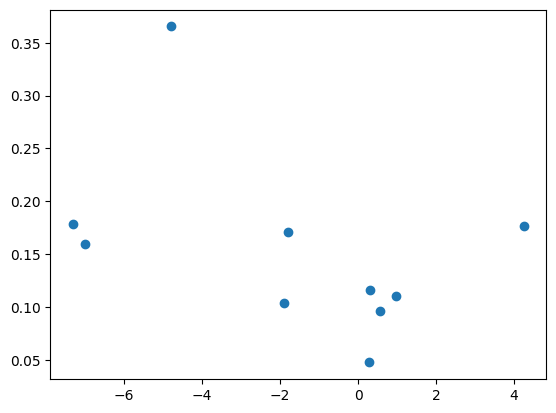

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=df_annual_reports.C2C, y=df_annual_reports.MET)

In [ ]:
import requests
import json

# Define your API Key and the ticker symbol
api_key = 'XZII8KNM2M78ZF4X'
ticker_symbol = 'WMT'

# Set up the API URL
url_bs = f"https://www.alphavantage.co/query?function=BALANCE_SHEET&symbol={ticker_symbol}&apikey={api_key}"
url_fs = f"https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol={ticker_symbol}&apikey={api_key}"


# Make the request and load the data
response = requests.get(url_fs)
data = response.json()

# Extract and print the balance sheet data
balance_sheets = data.get('annualReports', [])
for report in balance_sheets:
    print(report)

{'fiscalDateEnding': '2023-01-31', 'reportedCurrency': 'USD', 'grossProfit': '147568000000', 'totalRevenue': '611289000000', 'costOfRevenue': '463721000000', 'costofGoodsAndServicesSold': '463721000000', 'operatingIncome': '20428000000', 'sellingGeneralAndAdministrative': '127140000000', 'researchAndDevelopment': 'None', 'operatingExpenses': '127736000000', 'investmentIncomeNet': '254000000', 'netInterestIncome': '-1874000000', 'interestIncome': '169000000', 'interestExpense': '2043000000', 'nonInterestIncome': '605881000000', 'otherNonOperatingIncome': '-1538000000', 'depreciation': 'None', 'depreciationAndAmortization': '596000000', 'incomeBeforeTax': '17404000000', 'incomeTaxExpense': '5724000000', 'interestAndDebtExpense': '2043000000', 'netIncomeFromContinuingOperations': '11292000000', 'comprehensiveIncomeNetOfTax': '10028000000', 'ebit': '20428000000', 'ebitda': '20043000000', 'netIncome': '11680000000'}
{'fiscalDateEnding': '2022-01-31', 'reportedCurrency': 'USD', 'grossProfit'

In [ ]:
balance_sheets

[{'fiscalDateEnding': '2023-01-31',
  'reportedCurrency': 'USD',
  'totalAssets': '243197000000',
  'totalCurrentAssets': '75655000000',
  'cashAndCashEquivalentsAtCarryingValue': '8625000000',
  'cashAndShortTermInvestments': '19794000000',
  'inventory': '56576000000',
  'currentNetReceivables': '7933000000',
  'totalNonCurrentAssets': '171842000000',
  'propertyPlantEquipment': '100760000000',
  'accumulatedDepreciationAmortizationPPE': '101610000000',
  'intangibleAssets': '32474000000',
  'intangibleAssetsExcludingGoodwill': '4300000000',
  'goodwill': '28174000000',
  'investments': '500000000',
  'longTermInvestments': 'None',
  'shortTermInvestments': '11169000000',
  'otherCurrentAssets': '2521000000',
  'otherNonCurrentAssets': '20134000000',
  'totalLiabilities': '166504000000',
  'totalCurrentLiabilities': '92198000000',
  'currentAccountsPayable': '53742000000',
  'deferredRevenue': 'None',
  'currentDebt': '5130000000',
  'shortTermDebt': '372000000',
  'totalNonCurrentLi